# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

In [3]:
DATA_PATH = Path('../data/')

## Options

In [4]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)

In [5]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [6]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [7]:
train_fy = FoldYielder(h5py.File(DATA_PATH/'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 15.231s 


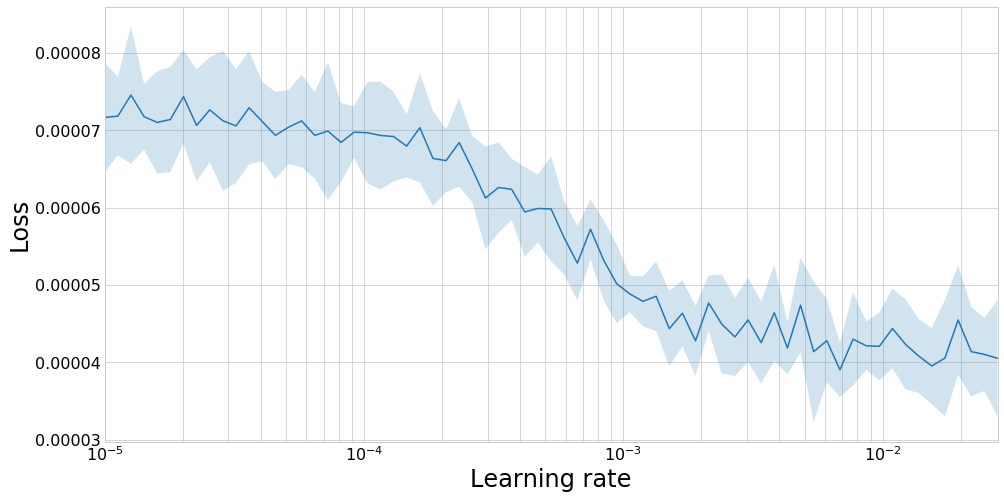

______________________________________



In [8]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [9]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100362). Check your callbacks.
  % delta_t_median)


1 New best found: 3.688864482856289e-05
2 New best found: 3.519717340775848e-05
3 New best found: 3.432866481438148e-05
5 New best found: 3.378111704454672e-05
6 New best found: 3.328633477451862e-05
7 New best found: 3.3137336364923875e-05
11 New best found: 3.304797914384639e-05
12 New best found: 3.284359833538052e-05
13 New best found: 3.249351663203632e-05
14 New best found: 3.239331308168878e-05
23 New best found: 3.2353230337403055e-05
25 New best found: 3.230792385191105e-05
26 New best found: 3.212562401527501e-05
28 New best found: 3.2045476033220386e-05
29 New best found: 3.199519054653416e-05
55 New best found: 3.188273379046664e-05
56 New best found: 3.184191344047561e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.00022777852649451198
Early stopping after 137 epochs
Score is: {'loss': 3.184191344047561e-05, 'wAUC': 0.06344935125817641, 'AUC': 0.10086230106779936, 'AMS': 3.7625828103056675, 'cut': 0.9602555632591248}


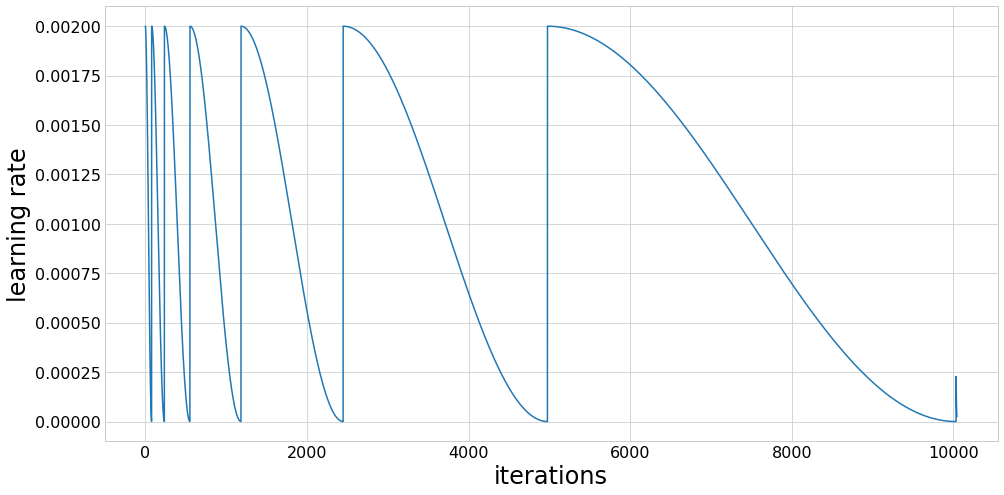

Fold took 107.994s

Training model 2 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.235551). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.118125). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7378794101823585e-05
2 New best found: 3.5364825261058284e-05
3 New best found: 3.4428934707830195e-05
4 New best found: 3.4275268000783396e-05
5 New best found: 3.360825706477044e-05
6 New best found: 3.33426822850015e-05
7 New best found: 3.3147675328655166e-05
11 New best found: 3.298131167393876e-05
12 New best found: 3.260674768389436e-05
14 New best found: 3.24703699327074e-05
15 New best found: 3.243079555104487e-05
24 New best found: 3.23889612685889e-05
25 New best found: 3.2194048608653246e-05
26 New best found: 3.2134634227259084e-05
27 New best found: 3.210767630662303e-05
28 New best found: 3.2042547456512695e-05
29 New best found: 3.2035449324757794e-05
30 New best found: 3.200353258871473e-05
31 New best found: 3.200020012300229e-05
52 New best found: 3.199719247058965e-05
53 New best found: 3.19122225017054e-05
56 New best found: 3.187273257935885e-05
57 New best found: 3.182956229429692e-05
60 New best found: 3.1821210587804674e-05
61 New best found

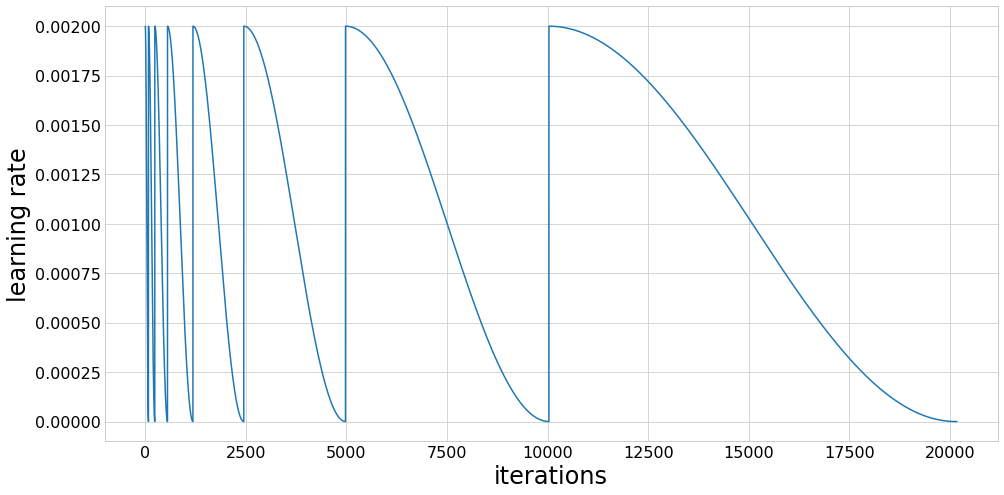

Fold took 222.690s

Training model 3 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.233691). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117201). Check your callbacks.
  % delta_t_median)


1 New best found: 3.801699728858566e-05
2 New best found: 3.56006482688248e-05
3 New best found: 3.487271603756996e-05
4 New best found: 3.463373894022325e-05
5 New best found: 3.436487443573374e-05
6 New best found: 3.371620050668305e-05
7 New best found: 3.360618861302761e-05
10 New best found: 3.3587663866318094e-05
11 New best found: 3.335048370857428e-05
12 New best found: 3.3173601112510295e-05
13 New best found: 3.292857395153741e-05
15 New best found: 3.290460562377533e-05
24 New best found: 3.260417970462637e-05
26 New best found: 3.260221611188655e-05
27 New best found: 3.25715146155314e-05
28 New best found: 3.252222867543377e-05
29 New best found: 3.248277824224623e-05
49 New best found: 3.228553590834691e-05
51 New best found: 3.2270913863659735e-05
57 New best found: 3.224300168054752e-05
58 New best found: 3.220373669996477e-05
60 New best found: 3.218301562428204e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=4.342114733391104e-05
Early stopping 

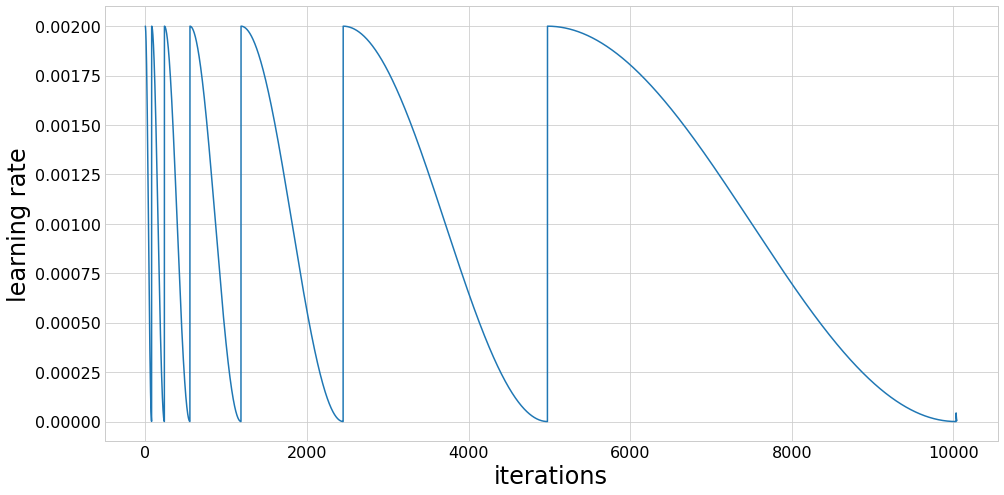

Fold took 112.744s

Training model 4 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.275691). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138171). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7453003344118224e-05
2 New best found: 3.5350381312611625e-05
3 New best found: 3.4445189131271455e-05
5 New best found: 3.3643294396520186e-05
6 New best found: 3.3234944674446924e-05
7 New best found: 3.3230724308576704e-05
8 New best found: 3.318408907730724e-05
9 New best found: 3.3007938606499724e-05
11 New best found: 3.2833266071790335e-05
12 New best found: 3.2681819990427976e-05
13 New best found: 3.24950895269961e-05
15 New best found: 3.2452579793115096e-05
24 New best found: 3.2396445877479096e-05
25 New best found: 3.229774234846475e-05
26 New best found: 3.213550415245498e-05
27 New best found: 3.208206390852153e-05
29 New best found: 3.2068725227981664e-05
30 New best found: 3.204118210778074e-05
53 New best found: 3.199740381843171e-05
54 New best found: 3.187401165793576e-05
57 New best found: 3.1868179070478735e-05
58 New best found: 3.184883672915777e-05
62 New best found: 3.1842163503281014e-05
63 New best found: 3.184065713893609e-05
CosineAnnea

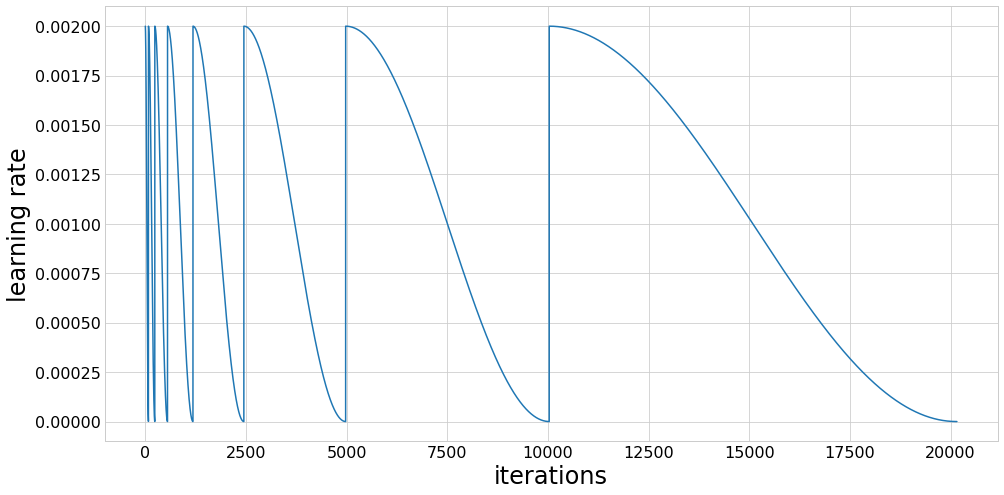

Fold took 217.693s

Training model 5 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.300784). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150730). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7656625303742853e-05
2 New best found: 3.5501686185251236e-05
3 New best found: 3.4986719670955425e-05
5 New best found: 3.411872940358554e-05
6 New best found: 3.376979986867915e-05
7 New best found: 3.359825717800232e-05
10 New best found: 3.357507689931728e-05
11 New best found: 3.3551588118610504e-05
12 New best found: 3.336044480524702e-05
13 New best found: 3.3030876171070566e-05
14 New best found: 3.28452522037294e-05
23 New best found: 3.273883815132773e-05
25 New best found: 3.270887480267343e-05
30 New best found: 3.267744660527153e-05
31 New best found: 3.2670990780764185e-05
48 New best found: 3.267097336052305e-05
49 New best found: 3.2653020299835666e-05
50 New best found: 3.2447616770875044e-05
52 New best found: 3.239635977144036e-05
60 New best found: 3.234895450867174e-05
61 New best found: 3.234811425462611e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=1.9457920170504707e-05
Early stopping after 137 epochs
Score is: {'loss

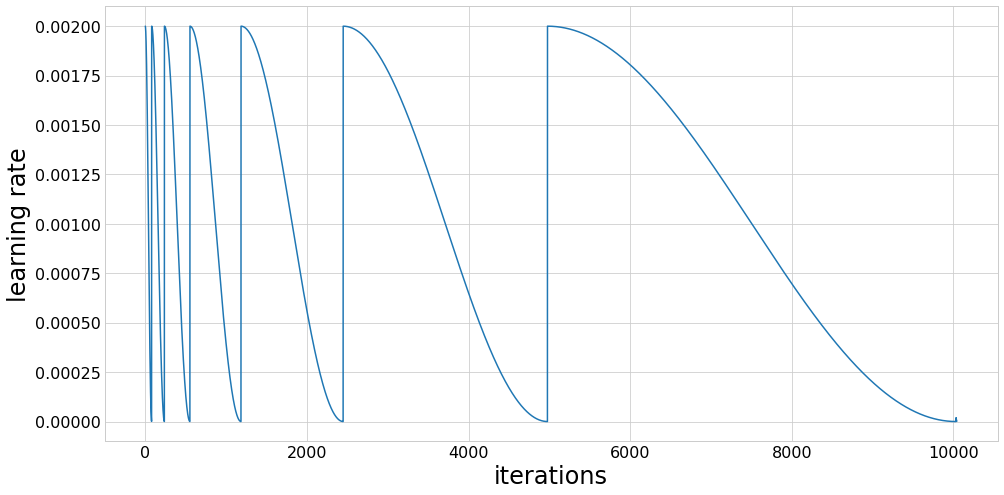

Fold took 115.406s

Training model 6 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.349586). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175179). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8227140718663574e-05
2 New best found: 3.592071971361293e-05
3 New best found: 3.47941043888568e-05
4 New best found: 3.439331244662753e-05
5 New best found: 3.400399110978469e-05
6 New best found: 3.356174611617462e-05
7 New best found: 3.335954859139747e-05
10 New best found: 3.295758126041619e-05
12 New best found: 3.292234269538312e-05
13 New best found: 3.2688006450189276e-05
14 New best found: 3.266644326213282e-05
24 New best found: 3.254315450467402e-05
26 New best found: 3.244806673392304e-05
27 New best found: 3.230446533489157e-05
28 New best found: 3.2298640516819435e-05
29 New best found: 3.227591589020449e-05
30 New best found: 3.227276620091288e-05
31 New best found: 3.22614229444298e-05
51 New best found: 3.214825384275173e-05
53 New best found: 3.214204398100264e-05
54 New best found: 3.2131825022952395e-05
55 New best found: 3.211904930431047e-05
56 New best found: 3.207742345039151e-05
58 New best found: 3.2045774831203744e-05
61 New best found: 3

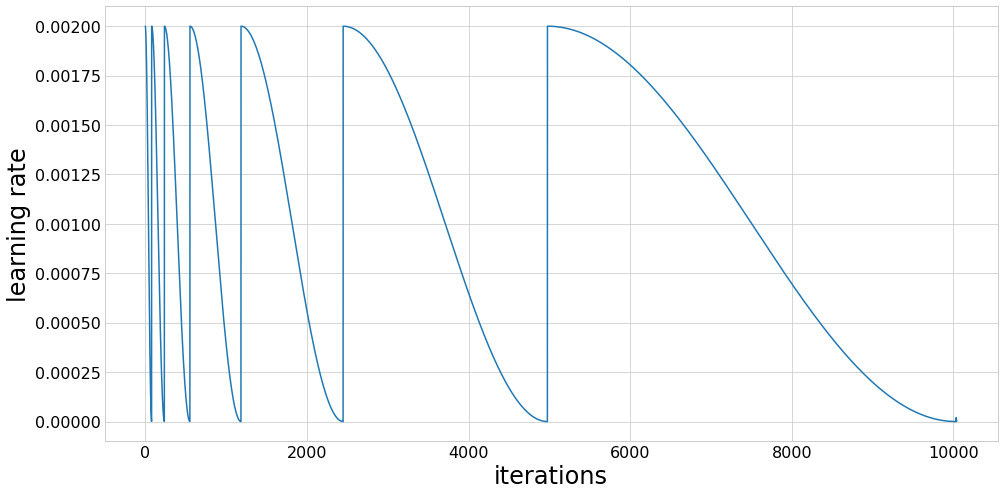

Fold took 117.901s

Training model 7 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.364655). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182680). Check your callbacks.
  % delta_t_median)


1 New best found: 3.6515675168877545e-05
2 New best found: 3.463385593728698e-05
3 New best found: 3.419954827973007e-05
4 New best found: 3.378484833163308e-05
5 New best found: 3.355141657196551e-05
6 New best found: 3.3120945085476907e-05
7 New best found: 3.2915779184529614e-05
10 New best found: 3.281560132778542e-05
11 New best found: 3.247903207818258e-05
13 New best found: 3.22939902532103e-05
14 New best found: 3.2205097892420164e-05
15 New best found: 3.218934827794884e-05
25 New best found: 3.200264516183211e-05
27 New best found: 3.187635132066717e-05
28 New best found: 3.187202493418299e-05
29 New best found: 3.183293754777787e-05
30 New best found: 3.182410747523193e-05
31 New best found: 3.181889185860116e-05
54 New best found: 3.177932532224598e-05
56 New best found: 3.1728382171474004e-05
59 New best found: 3.171440820554335e-05
61 New best found: 3.16999265410155e-05
62 New best found: 3.169716561106529e-05
63 New best found: 3.16963132480384e-05
CosineAnneal stalling

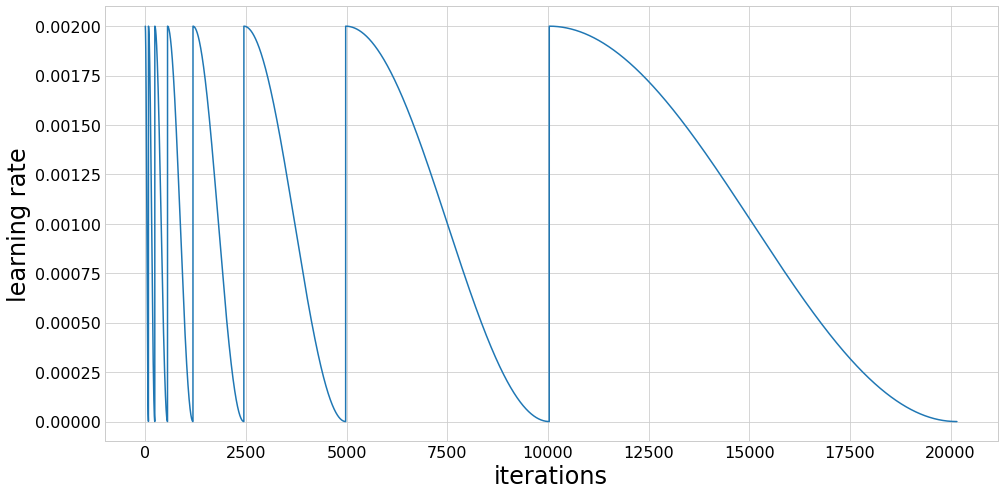

Fold took 228.725s

Training model 8 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.378750). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189738). Check your callbacks.
  % delta_t_median)


1 New best found: 3.759642801887821e-05
2 New best found: 3.468022058077622e-05
3 New best found: 3.4087688761064784e-05
4 New best found: 3.3698646747507154e-05
5 New best found: 3.309673887270037e-05
6 New best found: 3.285577817732701e-05
7 New best found: 3.268542743608123e-05
10 New best found: 3.239950382994721e-05
11 New best found: 3.2314980309456586e-05
13 New best found: 3.209789992251899e-05
14 New best found: 3.1887129772803745e-05
15 New best found: 3.1882534197939096e-05
22 New best found: 3.179046899458626e-05
26 New best found: 3.160907118581235e-05
27 New best found: 3.159523164940765e-05
28 New best found: 3.1466683918552006e-05
29 New best found: 3.143598287279019e-05
47 New best found: 3.138795233753626e-05
53 New best found: 3.1260701719293135e-05
55 New best found: 3.1220913023571484e-05
57 New best found: 3.119888035071199e-05
58 New best found: 3.114560745016206e-05
59 New best found: 3.109912433210411e-05
60 New best found: 3.108410536660813e-05
CosineAnneal st

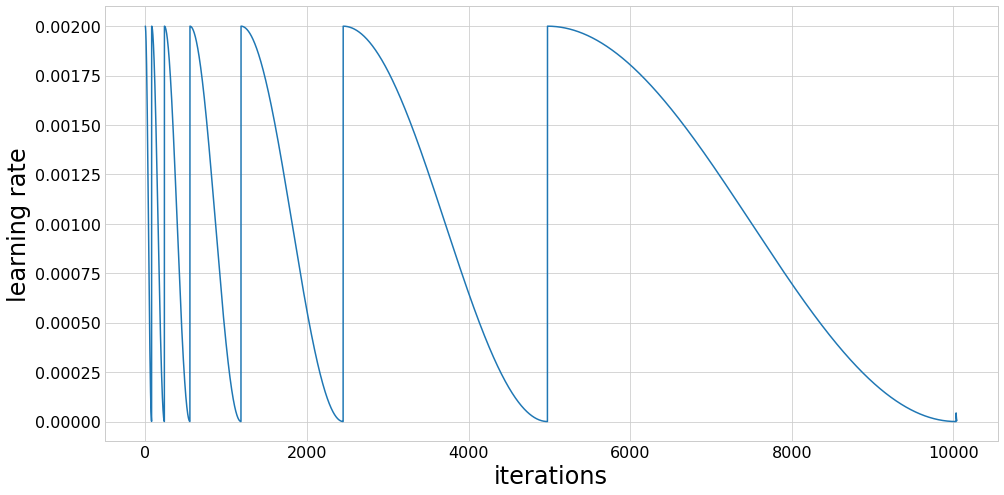

Fold took 121.979s

Training model 9 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.427447). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.214076). Check your callbacks.
  % delta_t_median)


1 New best found: 3.687264816149875e-05
2 New best found: 3.526538539457025e-05
3 New best found: 3.472864638412784e-05
5 New best found: 3.409701633124809e-05
6 New best found: 3.370167648054859e-05
7 New best found: 3.3492268855750465e-05
11 New best found: 3.335624965151677e-05
12 New best found: 3.3354855994940924e-05
13 New best found: 3.3228217191122943e-05
14 New best found: 3.2836276606218286e-05
15 New best found: 3.2820555927363545e-05
21 New best found: 3.271191886888997e-05
22 New best found: 3.261165850982878e-05
23 New best found: 3.2549476395296695e-05
25 New best found: 3.224665761612799e-05
29 New best found: 3.2196502309850345e-05
30 New best found: 3.215492697532278e-05
52 New best found: 3.201759398129128e-05
56 New best found: 3.195516630816926e-05
57 New best found: 3.190306021418156e-05
58 New best found: 3.190141435841206e-05
59 New best found: 3.185574271990227e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=7.659675222511076e-05
Early st

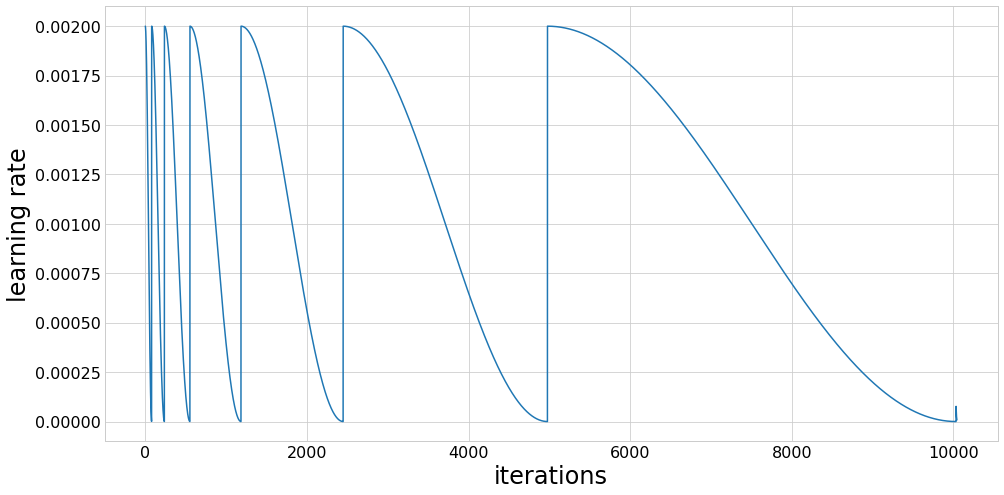

Fold took 124.482s

Training model 10 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.439440). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.220084). Check your callbacks.
  % delta_t_median)


1 New best found: 3.697101665457012e-05
2 New best found: 3.495882476127008e-05
3 New best found: 3.411736816051416e-05
4 New best found: 3.385725378466304e-05
5 New best found: 3.339117688155966e-05
6 New best found: 3.3007215958787126e-05
7 New best found: 3.2850826607318596e-05
10 New best found: 3.277738158358261e-05
11 New best found: 3.2700265348830726e-05
12 New best found: 3.2580928419338306e-05
13 New best found: 3.232642951625166e-05
14 New best found: 3.220048965304159e-05
15 New best found: 3.2186995393567484e-05
24 New best found: 3.197250141092809e-05
27 New best found: 3.18871279443556e-05
28 New best found: 3.184793443797389e-05
29 New best found: 3.182587133051129e-05
30 New best found: 3.181240572666866e-05
54 New best found: 3.178672267313232e-05
55 New best found: 3.177658990971395e-05
58 New best found: 3.177309288366814e-05
59 New best found: 3.1720357380254426e-05
60 New best found: 3.171292839906528e-05
61 New best found: 3.169720662335749e-05
62 New best found:

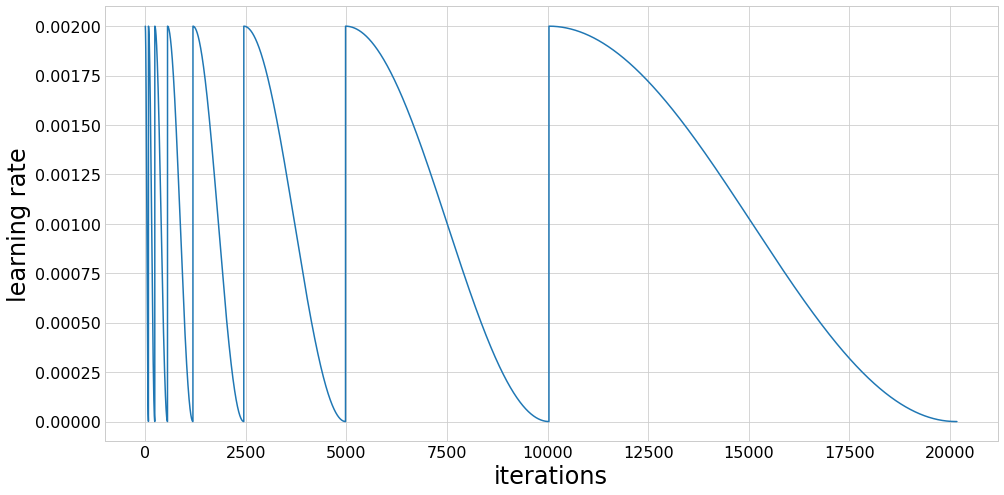

Fold took 255.786s


______________________________________
Training finished
Cross-validation took 1628.247s 


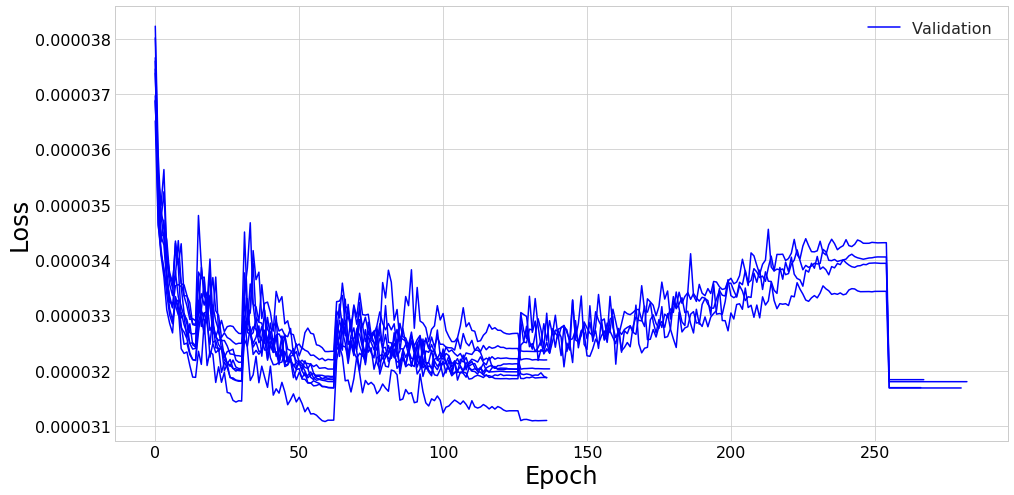

Mean loss = 3.18e-05 +- 1e-07
Mean wAUC = 0.0636 +- 0.0004
Mean AUC = 0.0992 +- 0.0007
Mean AMS = 3.8 +- 0.06
Mean cut = 0.944 +- 0.005
______________________________________



<Figure size 432x288 with 0 Axes>

In [10]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [11]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [12]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

Choosing ensemble by loss
Model 0 is 7 with loss = 3.108410536660813e-05
Model 1 is 9 with loss = 3.1690561892173716e-05
Model 2 is 6 with loss = 3.169631319201072e-05
Model 3 is 1 with loss = 3.1804329526494256e-05
Model 4 is 3 with loss = 3.184065706254342e-05
Model 5 is 0 with loss = 3.184191344047561e-05
Model 6 is 8 with loss = 3.185574271990227e-05
Model 7 is 5 with loss = 3.203022793823038e-05
Model 8 is 2 with loss = 3.218301562428204e-05
Model 9 is 4 with loss = 3.234811425462611e-05


## Response on validation data

In [13]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [14]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0018298588063567877s per sample

Predicting fold 2 out of 10
Prediction took 0.00034208069741725923s per sample

Predicting fold 3 out of 10
Prediction took 0.00033768932186067105s per sample

Predicting fold 4 out of 10
Prediction took 0.00033969282284379007s per sample

Predicting fold 5 out of 10
Prediction took 0.00033831650838255883s per sample

Predicting fold 6 out of 10
Prediction took 0.00034125974476337435s per sample

Predicting fold 7 out of 10
Prediction took 0.0003439290259033442s per sample

Predicting fold 8 out of 10
Prediction took 0.00034299745336174967s per sample

Predicting fold 9 out of 10
Prediction took 0.0003459635876119137s per sample

Predicting fold 10 out of 10
Prediction took 0.00033931447193026544s per sample



In [15]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9026817929922244, weighted 0.9355221469102926


In [16]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(3.910856211941518, 0.9642241)

In [17]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=4.0+-0.2, at mean cut of 0.96+-0.02
Exact mean cut 0.9642874104902148, corresponds to calc_ams of 3.9077142301513015
CPU times: user 2.23 s, sys: 16.4 s, total: 18.7 s
Wall time: 2min 7s


(4.0, 0.96)

# Test scoring

In [18]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [19]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0003440794040025635s per sample

Predicting fold 2 out of 10
Prediction took 0.0003436028243465857s per sample

Predicting fold 3 out of 10
Prediction took 0.00034471801160411403s per sample

Predicting fold 4 out of 10
Prediction took 0.00034161641701039945s per sample

Predicting fold 5 out of 10
Prediction took 0.0003431956769559871s per sample

Predicting fold 6 out of 10
Prediction took 0.00034502621831541714s per sample

Predicting fold 7 out of 10
Prediction took 0.00034524055187675086s per sample

Predicting fold 8 out of 10
Prediction took 0.00034258100431073797s per sample

Predicting fold 9 out of 10
Prediction took 0.0003423913733695041s per sample

Predicting fold 10 out of 10
Prediction took 0.00034612960185516963s per sample

CPU times: user 3min 23s, sys: 11.7 s, total: 3min 35s
Wall time: 3min 9s


In [20]:
score_test_data(test_fy.source, 0.9642874104902148)

Public:Private AMS: 3.5960145779055184 : 3.6473200822001206


(3.5960145779055184, 3.6473200822001206)

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)